In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, GRU, Input, Flatten, concatenate
from keras import Model
from keras.metrics import RootMeanSquaredError

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

### Load data

In [2]:
df = None
with open("covid_flow.pkl", "rb") as f:
    df = pickle.load(f)
df["case"] = df.index
df["t_point"] = df["t_point"].apply(lambda x: x[2:])
df["t_point"] = df["t_point"].apply(lambda x: int(x))
df.set_index(["case", "t_point"], inplace=True)
df = df.sort_values(["case", "t_point"])

#### Function which shows results of model

In [3]:
# Function which shows results of model
def show_results(X_test, y_test, model, history, batch_size=None, sample_num = 0):
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.legend(["train loss", "validation loss"])

    y_pred = model.predict(X_test, batch_size=batch_size, verbose=0)

    r2_scor = r2_score(y_test, y_pred, multioutput="raw_values")
    mse_score = mean_squared_error(y_test, y_pred, multioutput="raw_values")

    table=[]
    table.append(mse_score)
    table.append(r2_scor)

    df_score = pd.DataFrame(table, ["MSE", "R2"], columns=df.columns[29:42])
    df_score.to_csv("reports_w4/"+model.name+".csv")
    model.save("models_w4/"+model.name)
    display(df_score)
    plt.show()
    

## Train Models

#### Window 4

In [4]:
import prepare_data_covid as datacovid
(X_train, y_train), (X_test, y_test), (X_val, y_val) = \
datacovid.prepare_dynamic(df_input=df, window=4)
(X_train, y_train), (X_test, y_test), (X_val, y_val) =\
    (X_train, y_train), (X_test[4:], y_test[4:]), (X_val[4:], y_val[4:])
X_train.shape

TRAIN shape:  (288, 4, 13)
TEST shape:  (36, 13)
VAL shape:  (36, 13)


(288, 4, 13)

#### FNN

Model: "Faltten1Layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 52)                0         
                                                                 
 dense (Dense)               (None, 32)                1696      
                                                                 
 dense_1 (Dense)             (None, 13)                429       
                                                                 
Total params: 2,125
Trainable params: 2,125
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
9/9 [==============================] - 2s 106ms/step - loss: 0.1241 - val_loss: 0.0936
Epoch 2/30
9/9 [==============================] - 0s 35ms/step - loss: 0.0746 - val_loss: 0.0575
Epoch 3/30
9/9 [==============================] - 0s 24ms/step - loss: 0.0470 - val_loss: 0.0352
Epoch 4/30
9/9 [=======

,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.002450,0.016514,0.001336,0.015173,0.001703,0.004422,0.011684,0.003462,0.022207,0.035773,0.043898,0.002946,0.008964
R2,-0.635448,0.303339,-0.904954,-0.146198,-4.743965,-0.296898,-0.136606,0.045420,0.030100,0.790680,-0.101754,-2.133585,0.151376


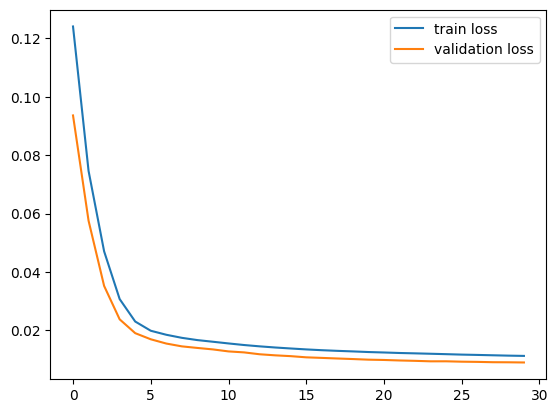

In [5]:
PARAMS_LENGTH = X_train.shape[2]
WINDOW=X_train.shape[1]
model = Sequential(name="Faltten1Layer")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
show_results(X_test, y_test, model, history)

Model: "Flatten3Layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 52)                0         
                                                                 
 dense_2 (Dense)             (None, 52)                2756      
                                                                 
 dense_3 (Dense)             (None, 13)                689       
                                                                 
 dense_4 (Dense)             (None, 13)                182       
                                                                 
 dense_5 (Dense)             (None, 13)                182       
                                                                 
Total params: 3,809
Trainable params: 3,809
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
9/9 [==============================] - 

,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.003608,0.023342,0.000885,0.014141,0.006773,0.003295,0.011814,0.008074,0.017102,0.083902,0.044264,0.003714,0.01769
R2,-1.408934,0.015252,-0.261115,-0.068230,-21.850275,0.033659,-0.149225,-1.226264,0.253065,0.509053,-0.110927,-2.950291,-0.67469


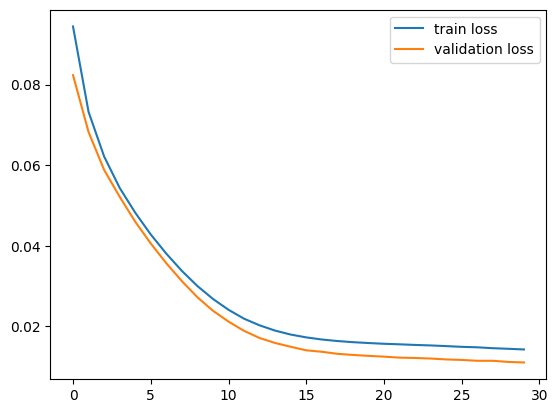

In [6]:
model = Sequential(name="Flatten3Layers")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(Flatten())
model.add(Dense(WINDOW*PARAMS_LENGTH, activation="relu"))
model.add(Dense(13, activation="relu"))
model.add(Dense(PARAMS_LENGTH, activation="relu"))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
show_results(X_test, y_test, model, history)

#### RNN

Simple RNN with linear activation 

Model: "SimpleRNN13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 13)                351       
                                                                 
 dense_6 (Dense)             (None, 13)                182       
                                                                 
Total params: 533
Trainable params: 533
Non-trainable params: 0
_________________________________________________________________
INFO:tensorflow:Assets written to: models_w4/SimpleRNN13\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.011199,0.043702,0.011267,0.023620,0.012132,0.017015,0.015221,0.014280,0.027751,0.084161,0.044089,0.015407,0.009546
R2,-6.476222,-0.843674,-15.063232,-0.784262,-39.925821,-3.990541,-0.480640,-2.937802,-0.212072,0.507536,-0.106552,-15.387754,0.096312


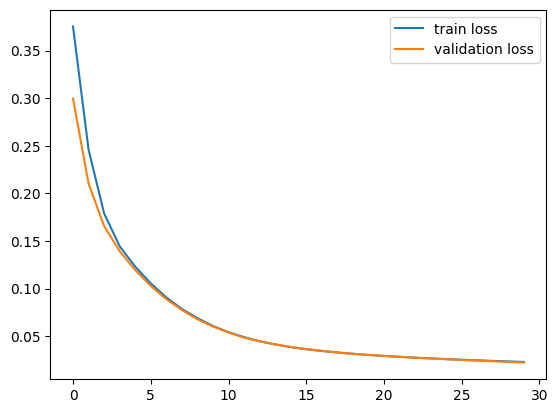

In [7]:
model = Sequential(name="SimpleRNN13")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(SimpleRNN(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0)
show_results(X_test, y_test, model, history)

SimpleRNN sigmoid

Model: "SimpleRNN13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 13)                351       
                                                                 
 dense_7 (Dense)             (None, 13)                182       
                                                                 
Total params: 533
Trainable params: 533
Non-trainable params: 0
_________________________________________________________________
INFO:tensorflow:Assets written to: models_w4/SimpleRNN13\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001666,0.036759,0.011652,0.013295,0.000343,0.008656,0.010986,0.003777,0.020414,0.083742,0.042602,0.006704,0.009068
R2,-0.112014,-0.550759,-15.612378,-0.004303,-0.157246,-1.538696,-0.068678,-0.041618,0.108416,0.509991,-0.069221,-6.130344,0.141562


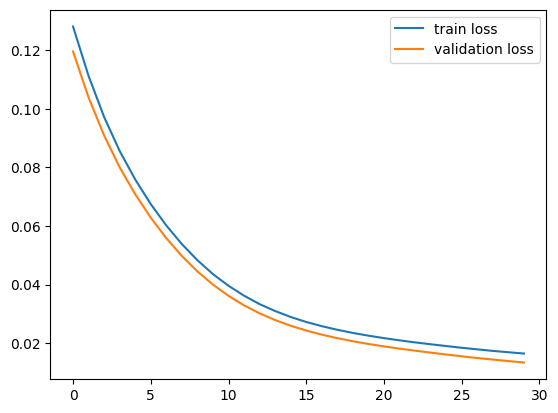

In [8]:
PARAMS_LENGTH = X_train.shape[2]
WINDOW = X_train.shape[1]
model = Sequential(name="SimpleRNN13")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(SimpleRNN(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="sigmoid"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0)
show_results(X_test, y_test, model, history)

SimpleRNN with Tanh activation

Model: "SimpleRNN13_Tanh"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 13)                351       
                                                                 
 dense_8 (Dense)             (None, 13)                182       
                                                                 
Total params: 533
Trainable params: 533
Non-trainable params: 0
_________________________________________________________________
INFO:tensorflow:Assets written to: models_w4/SimpleRNN13_Tanh\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.002054,0.028736,0.005859,0.014642,0.001717,0.004241,0.011895,0.008442,0.025753,0.105039,0.047933,0.002842,0.008483
R2,-0.371144,-0.212275,-7.353353,-0.106065,-4.790937,-0.244011,-0.157080,-1.327841,-0.124800,0.385375,-0.203017,-2.023338,0.196901


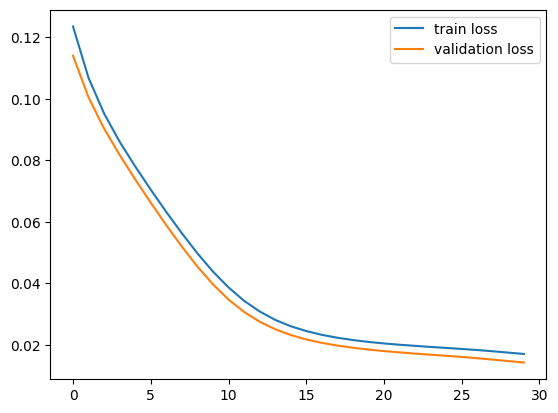

In [9]:
model = Sequential(name="SimpleRNN13_Tanh")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(SimpleRNN(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="sigmoid"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val),  verbose=0)
show_results(X_test, y_test, model, history)

Model: "6_LSTM13_Batch8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (8, 13)                   1404      
                                                                 
 dense_9 (Dense)             (8, 13)                   182       
                                                                 
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w4/6_LSTM13_Batch8\assets


INFO:tensorflow:Assets written to: models_w4/6_LSTM13_Batch8\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001999,0.013130,0.000937,0.013632,0.000611,0.005130,0.005218,0.002583,0.00886,0.031641,0.035180,0.001178,0.005239
R2,-0.334331,0.446085,-0.335783,-0.029805,-1.059876,-0.504757,0.492443,0.287619,0.61305,0.814855,0.117047,-0.252877,0.504034


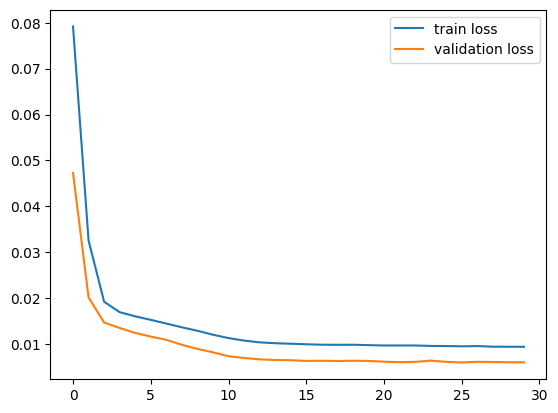

In [10]:
BATCH_SIZE=8

model = Sequential(name="6_LSTM13_Batch8")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(LSTM(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train,
 epochs=30, validation_data=(X_val, y_val), batch_size=BATCH_SIZE, verbose=0)
show_results(X_test, y_test, model, history, batch_size=BATCH_SIZE)

Model: "6_LSTM13_Batch8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (4, 13)                   1404      
                                                                 
 dense_10 (Dense)            (4, 13)                   182       
                                                                 
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w4/6_LSTM13_Batch8\assets


INFO:tensorflow:Assets written to: models_w4/6_LSTM13_Batch8\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001473,0.013328,0.000979,0.013398,0.000217,0.003654,0.005144,0.002861,0.006997,0.030751,0.036434,0.001701,0.004830
R2,0.016897,0.437752,-0.396044,-0.012126,0.267925,-0.071711,0.499639,0.211220,0.694418,0.820063,0.085584,-0.809037,0.542712


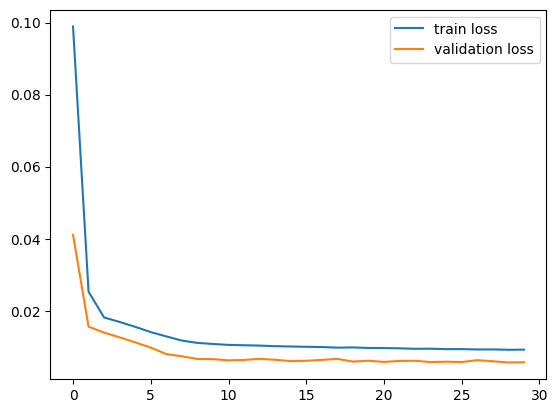

In [11]:
BATCH_SIZE=4

model = Sequential(name="6_LSTM13_Batch8")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(LSTM(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train,
 epochs=30, validation_data=(X_val, y_val), batch_size=BATCH_SIZE, verbose=0)
show_results(X_test, y_test, model, history, batch_size=BATCH_SIZE)

Model: "6_LSTM13_Batch8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (2, 13)                   1404      
                                                                 
 dense_11 (Dense)            (2, 13)                   182       
                                                                 
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w4/6_LSTM13_Batch8\assets


INFO:tensorflow:Assets written to: models_w4/6_LSTM13_Batch8\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001764,0.019160,0.001513,0.013080,0.000359,0.003715,0.004582,0.002199,0.007089,0.033561,0.032652,0.001089,0.005751
R2,-0.177530,0.191695,-1.157646,0.011902,-0.212484,-0.089545,0.554263,0.393758,0.690370,0.803621,0.180492,-0.158566,0.455573


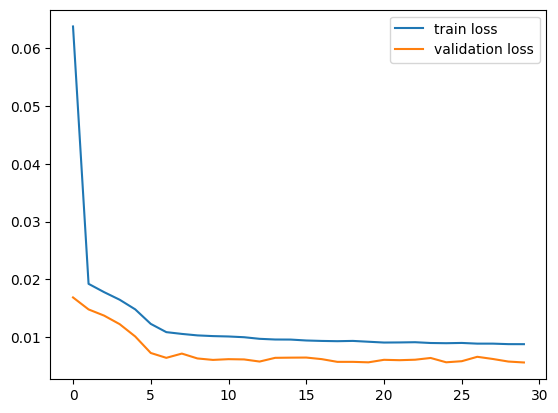

In [12]:
BATCH_SIZE=2

model = Sequential(name="6_LSTM13_Batch8")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(LSTM(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train,
 epochs=30, validation_data=(X_val, y_val), batch_size=BATCH_SIZE, verbose=0)
show_results(X_test, y_test, model, history, batch_size=BATCH_SIZE)

Model: "6_LSTM13_Batch8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (1, 13)                   1404      
                                                                 
 dense_12 (Dense)            (1, 13)                   182       
                                                                 
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w4/6_LSTM13_Batch8\assets


INFO:tensorflow:Assets written to: models_w4/6_LSTM13_Batch8\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001715,0.008631,0.000657,0.013007,0.000247,0.003288,0.004788,0.002524,0.006813,0.032521,0.036193,0.000914,0.005413
R2,-0.144722,0.635895,0.063264,0.017428,0.165497,0.035643,0.534279,0.304134,0.702429,0.809708,0.091633,0.028088,0.487603


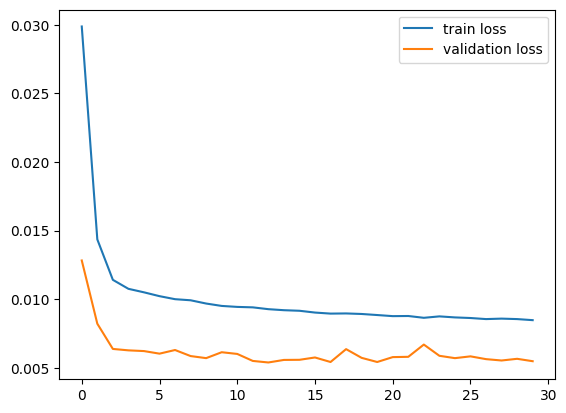

In [13]:
BATCH_SIZE=1

model = Sequential(name="6_LSTM13_Batch8")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(LSTM(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train,
 epochs=30, validation_data=(X_val, y_val), batch_size=BATCH_SIZE, verbose=0)
show_results(X_test, y_test, model, history, batch_size=BATCH_SIZE)

### LSTM

LSTM 13 units and linear

Model: "LSTM13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 13)                1404      
                                                                 
 dense_13 (Dense)            (None, 13)                182       
                                                                 
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w4/LSTM13\assets


INFO:tensorflow:Assets written to: models_w4/LSTM13\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.002505,0.023096,0.002248,0.015745,0.000443,0.003859,0.009609,0.002997,0.017712,0.039288,0.038834,0.005250,0.007071
R2,-0.672151,0.025643,-2.205554,-0.189396,-0.495844,-0.131873,0.065320,0.173718,0.226418,0.770109,0.025340,-4.583786,0.330559


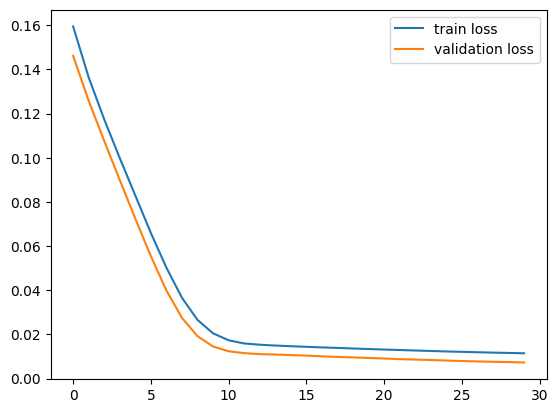

In [14]:
model = Sequential(name="LSTM13")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(LSTM(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0)
show_results(X_test, y_test, model, history)

LSTMWithMore Units

Model: "LSTM32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 32)                5888      
                                                                 
 dense_14 (Dense)            (None, 13)                429       
                                                                 
Total params: 6,317
Trainable params: 6,317
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w4/LSTM32\assets


INFO:tensorflow:Assets written to: models_w4/LSTM32\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.002051,0.016605,0.002386,0.015464,0.000503,0.003829,0.007577,0.002202,0.008138,0.030742,0.031859,0.000785,0.004843
R2,-0.369286,0.299503,-2.401125,-0.168161,-0.698011,-0.122980,0.262923,0.392735,0.644549,0.820113,0.200391,0.165277,0.541563


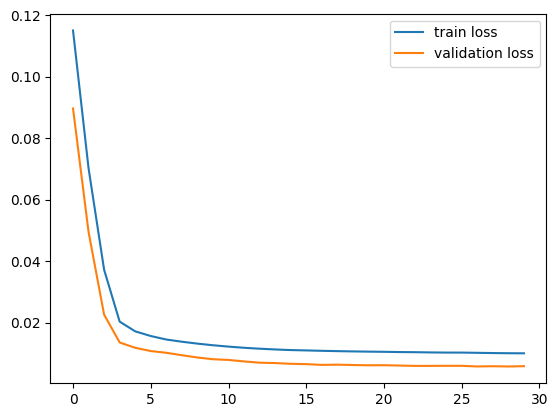

In [15]:
model = Sequential(name="LSTM32")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0)
show_results(X_test, y_test, model, history)

Model: "LSTM64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                19968     
                                                                 
 dense_15 (Dense)            (None, 13)                845       
                                                                 
Total params: 20,813
Trainable params: 20,813
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w4/LSTM64\assets


INFO:tensorflow:Assets written to: models_w4/LSTM64\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001894,0.011625,0.000773,0.015061,0.000264,0.003197,0.005444,0.002791,0.008034,0.029587,0.03545,0.001176,0.004352
R2,-0.264266,0.509594,-0.101775,-0.137735,0.110855,0.062249,0.470409,0.230346,0.649103,0.826872,0.11027,-0.251098,0.587975


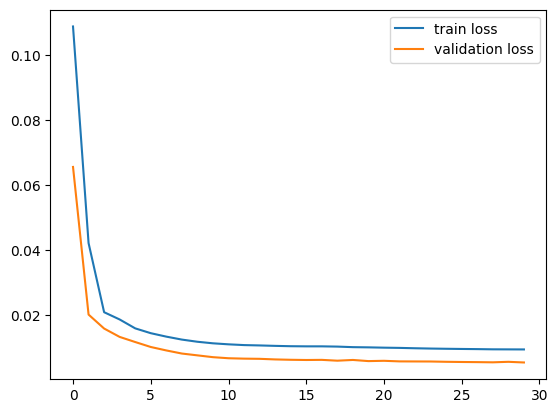

In [16]:
model = Sequential(name="LSTM64")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0)
show_results(X_test, y_test, model, history)

LSTM with batch

Model: "LSTM13_Batch8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (8, 13)                   1404      
                                                                 
 dense_16 (Dense)            (8, 13)                   182       
                                                                 
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w4/LSTM13_Batch8\assets


INFO:tensorflow:Assets written to: models_w4/LSTM13_Batch8\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001534,0.016174,0.000983,0.014963,0.000176,0.003521,0.007299,0.002855,0.009956,0.031238,0.033556,0.001095,0.006017
R2,-0.023797,0.317667,-0.400868,-0.130289,0.404697,-0.032635,0.290012,0.212694,0.565176,0.817213,0.157817,-0.164515,0.430335


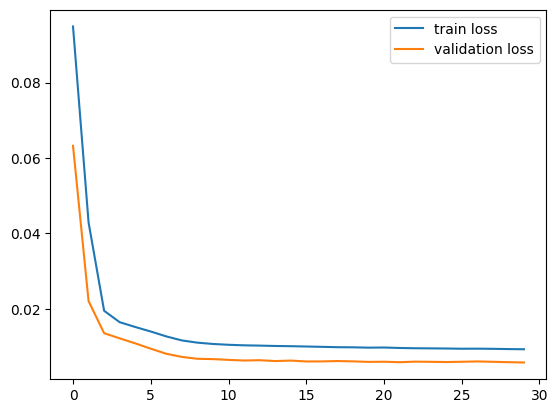

In [17]:
BATCH_SIZE=8

model = Sequential(name="LSTM13_Batch8")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(LSTM(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train,
 epochs=30, validation_data=(X_val, y_val), batch_size=BATCH_SIZE, verbose=0)
show_results(X_test, y_test, model, history, batch_size=BATCH_SIZE)

Model: "LSTM13_Batch4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (4, 13)                   1404      
                                                                 
 dense_17 (Dense)            (4, 13)                   182       
                                                                 
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w4/LSTM13_Batch4\assets


INFO:tensorflow:Assets written to: models_w4/LSTM13_Batch4\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001732,0.015485,0.000714,0.012290,0.000312,0.003452,0.006290,0.003105,0.005947,0.028879,0.033679,0.001177,0.004683
R2,-0.156337,0.346747,-0.017984,0.071622,-0.053128,-0.012526,0.388126,0.143897,0.740266,0.831018,0.154731,-0.252093,0.556688


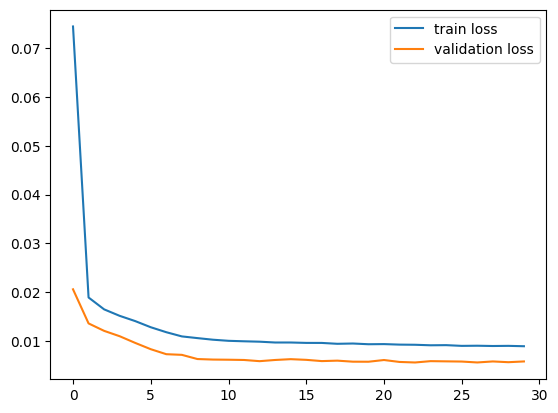

In [18]:
BATCH_SIZE=4
model = Sequential(name="LSTM13_Batch4")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(LSTM(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train,
 epochs=30, validation_data=(X_val, y_val), batch_size=BATCH_SIZE, verbose=0)
show_results(X_test, y_test, model, history, batch_size=BATCH_SIZE)

Model: "LSTM13_Batch2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (2, 13)                   1404      
                                                                 
 dense_18 (Dense)            (2, 13)                   182       
                                                                 
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w4/LSTM13_Batch2\assets


INFO:tensorflow:Assets written to: models_w4/LSTM13_Batch2\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001870,0.013528,0.000741,0.013300,0.000367,0.003700,0.005340,0.002815,0.006605,0.031171,0.036860,0.001101,0.005125
R2,-0.248298,0.429286,-0.055875,-0.004657,-0.236532,-0.085295,0.480559,0.223891,0.711533,0.817608,0.074879,-0.170580,0.514859


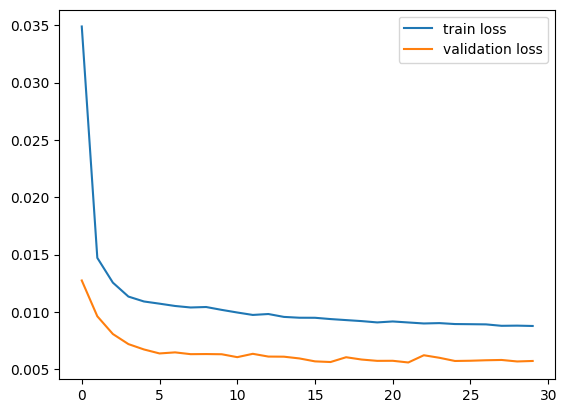

In [19]:
BATCH_SIZE=2
model = Sequential(name="LSTM13_Batch2")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(LSTM(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train,
 epochs=30, validation_data=(X_val, y_val), batch_size=BATCH_SIZE, verbose=0)
show_results(X_test, y_test, model, history, batch_size=BATCH_SIZE)

Model: "LSTM13_Batch1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (1, 13)                   1404      
                                                                 
 dense_19 (Dense)            (1, 13)                   182       
                                                                 
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w4/LSTM13_Batch1\assets


INFO:tensorflow:Assets written to: models_w4/LSTM13_Batch1\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001583,0.013554,0.001417,0.012969,0.000310,0.003232,0.003594,0.002740,0.006146,0.032285,0.037372,0.001394,0.005156
R2,-0.057068,0.428211,-1.019530,0.020307,-0.046333,0.051943,0.650432,0.244482,0.731560,0.811086,0.062048,-0.482731,0.511932


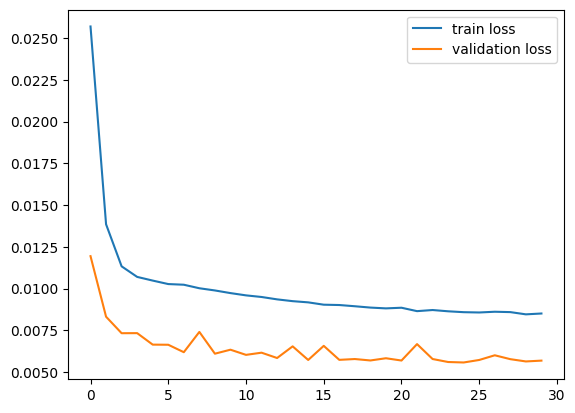

In [20]:
BATCH_SIZE=1
model = Sequential(name="LSTM13_Batch1")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(LSTM(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train,
 epochs=30, validation_data=(X_val, y_val), batch_size=BATCH_SIZE, verbose=0)
show_results(X_test, y_test, model, history, batch_size=BATCH_SIZE)

LSTM to LSTM

Model: "LSTM64xLSTM13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 4, 32)             5888      
                                                                 
 lstm_12 (LSTM)              (None, 13)                2392      
                                                                 
 dense_20 (Dense)            (None, 13)                182       
                                                                 
Total params: 8,462
Trainable params: 8,462
Non-trainable params: 0
_________________________________________________________________
None


INFO:tensorflow:Assets written to: models_w4/LSTM64xLSTM13\assets


INFO:tensorflow:Assets written to: models_w4/LSTM64xLSTM13\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001479,0.024486,0.001070,0.014117,0.000319,0.003105,0.008558,0.003543,0.018372,0.029128,0.040833,0.000952,0.006124
R2,0.012804,-0.033009,-0.525433,-0.066400,-0.077504,0.089230,0.167520,0.022914,0.197561,0.829557,-0.024835,-0.012800,0.420259


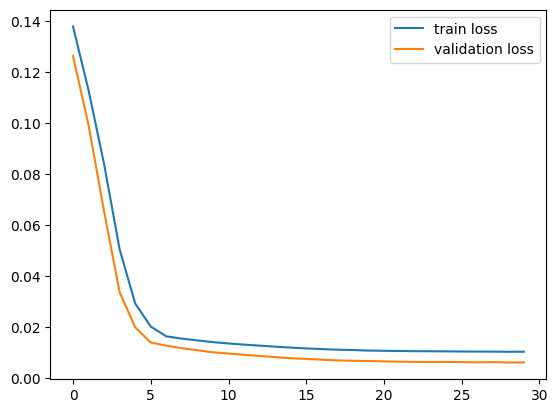

In [21]:
model = Sequential(name="LSTM64xLSTM13")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
print(model.summary())
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0)
show_results(X_test, y_test, model, history)

LSTM64xLSTM13_Batch4

Model: "LSTM64xLSTM13_Batch4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (4, 4, 32)                5888      
                                                                 
 lstm_14 (LSTM)              (4, 13)                   2392      
                                                                 
 dense_21 (Dense)            (4, 13)                   182       
                                                                 
Total params: 8,462
Trainable params: 8,462
Non-trainable params: 0
_________________________________________________________________
None


INFO:tensorflow:Assets written to: models_w4/LSTM64xLSTM13_Batch4\assets


INFO:tensorflow:Assets written to: models_w4/LSTM64xLSTM13_Batch4\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001794,0.013780,0.000607,0.013205,0.000339,0.003915,0.003396,0.002975,0.007547,0.029353,0.035511,0.001514,0.005298
R2,-0.197373,0.418649,0.134370,0.002519,-0.143117,-0.148376,0.669638,0.179529,0.670381,0.828241,0.108747,-0.610637,0.498480


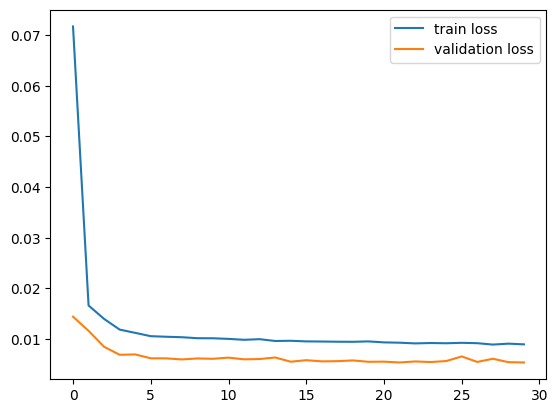

In [22]:
BATCH_SIZE=4
model = Sequential(name="LSTM64xLSTM13_Batch4")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
print(model.summary())
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=BATCH_SIZE, verbose=0)
show_results(X_test, y_test, model, history, batch_size=BATCH_SIZE)

Model: "LSTM64_LSTM32_Dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 4, 64)             19968     
                                                                 
 lstm_16 (LSTM)              (None, 32)                12416     
                                                                 
 dense_22 (Dense)            (None, 13)                429       
                                                                 
Total params: 32,813
Trainable params: 32,813
Non-trainable params: 0
_________________________________________________________________
None


INFO:tensorflow:Assets written to: models_w4/LSTM64_LSTM32_Dense\assets


INFO:tensorflow:Assets written to: models_w4/LSTM64_LSTM32_Dense\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001771,0.012957,0.000954,0.013659,0.000702,0.002972,0.008007,0.003302,0.008320,0.033149,0.034064,0.001134,0.00547
R2,-0.182639,0.453374,-0.359767,-0.031821,-1.369594,0.128365,0.221161,0.089582,0.636594,0.806033,0.145066,-0.206202,0.48220


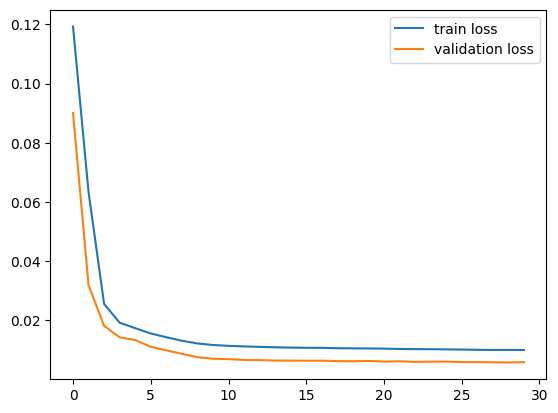

In [23]:
model = Sequential(name="LSTM64_LSTM32_Dense")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
print(model.summary())
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0)
show_results(X_test, y_test, model, history)

LSTM64xLSTM32_Batch4

Model: "LSTM64xLSTM32_Batch4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (4, 4, 64)                19968     
                                                                 
 lstm_18 (LSTM)              (4, 32)                   12416     
                                                                 
 dense_23 (Dense)            (4, 13)                   429       
                                                                 
Total params: 32,813
Trainable params: 32,813
Non-trainable params: 0
_________________________________________________________________
None


INFO:tensorflow:Assets written to: models_w4/LSTM64xLSTM32_Batch4\assets


INFO:tensorflow:Assets written to: models_w4/LSTM64xLSTM32_Batch4\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001812,0.011392,0.001118,0.013516,0.000322,0.003043,0.003829,0.002602,0.010916,0.030884,0.038744,0.001376,0.006290
R2,-0.209573,0.519419,-0.593827,-0.021014,-0.086244,0.107584,0.627538,0.282590,0.523238,0.819285,0.027593,-0.463154,0.404522


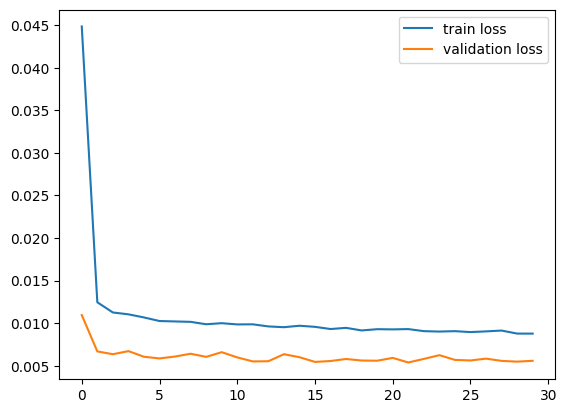

In [24]:
BATCH_SIZE=4
model = Sequential(name="LSTM64xLSTM32_Batch4")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
print(model.summary())
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=BATCH_SIZE, verbose=0)
show_results(X_test, y_test, model, history, batch_size=BATCH_SIZE)

#### GRU

Model: "GRU13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 13)                1092      
                                                                 
 dense_24 (Dense)            (None, 13)                182       
                                                                 
Total params: 1,274
Trainable params: 1,274
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w4/GRU13\assets


INFO:tensorflow:Assets written to: models_w4/GRU13\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.004945,0.015626,0.001888,0.016647,0.002559,0.004701,0.012387,0.005175,0.017990,0.041959,0.058388,0.002858,0.014256
R2,-2.301274,0.340789,-1.691932,-0.257493,-7.632477,-0.378725,-0.204954,-0.426899,0.214278,0.754478,-0.465426,-2.039608,-0.349623


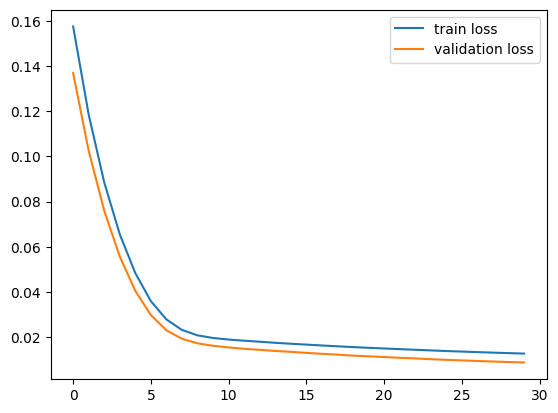

In [25]:
model = Sequential(name="GRU13")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(GRU(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0)
show_results(X_test, y_test, model, history)

Model: "GRU13_Batch8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (8, 13)                   1092      
                                                                 
 dense_25 (Dense)            (8, 13)                   182       
                                                                 
Total params: 1,274
Trainable params: 1,274
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w4/GRU13_Batch8\assets


INFO:tensorflow:Assets written to: models_w4/GRU13_Batch8\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.002418,0.017318,0.000893,0.017742,0.000674,0.002861,0.006895,0.003299,0.00830,0.028086,0.040369,0.002146,0.005375
R2,-0.614212,0.269406,-0.273613,-0.340211,-1.272181,0.160740,0.329257,0.090412,0.63748,0.835655,-0.013179,-1.282880,0.491184


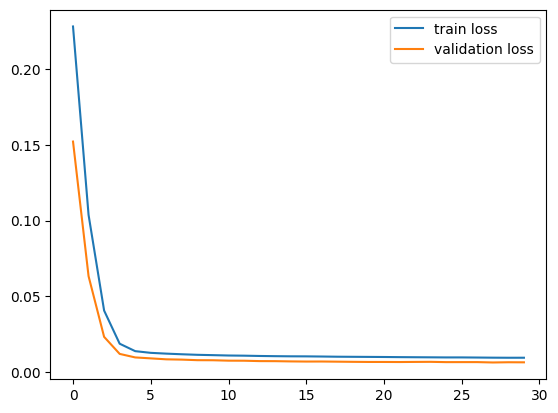

In [26]:
BATCH_SIZE = 8
model = Sequential(name="GRU13_Batch8")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(GRU(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0, batch_size=BATCH_SIZE)
show_results(X_test, y_test, model, history , batch_size=BATCH_SIZE)

Model: "GRU13_Batch4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (4, 13)                   1092      
                                                                 
 dense_26 (Dense)            (4, 13)                   182       
                                                                 
Total params: 1,274
Trainable params: 1,274
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w4/GRU13_Batch4\assets


INFO:tensorflow:Assets written to: models_w4/GRU13_Batch4\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.002874,0.013653,0.000928,0.014142,0.000207,0.002310,0.005448,0.004742,0.008693,0.031281,0.038965,0.001744,0.005218
R2,-0.918578,0.424006,-0.322748,-0.068319,0.300805,0.322373,0.470003,-0.307578,0.620341,0.816963,0.022044,-0.855032,0.505989


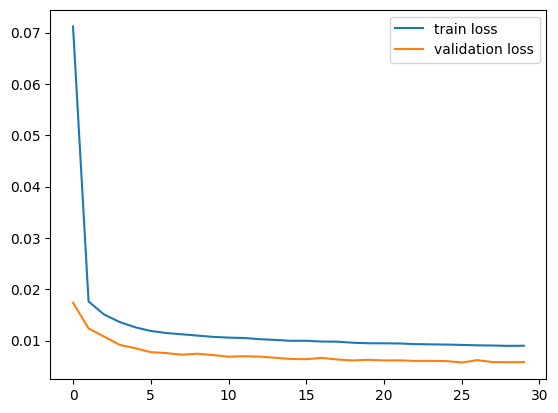

In [27]:
BATCH_SIZE = 4
model = Sequential(name="GRU13_Batch4")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(GRU(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0, batch_size=BATCH_SIZE)
show_results(X_test, y_test, model, history , batch_size=BATCH_SIZE)

Model: "GRU13_Batch2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (2, 13)                   1092      
                                                                 
 dense_27 (Dense)            (2, 13)                   182       
                                                                 
Total params: 1,274
Trainable params: 1,274
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w4/GRU13_Batch2\assets


INFO:tensorflow:Assets written to: models_w4/GRU13_Batch2\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001610,0.015900,0.001874,0.013436,0.000369,0.002997,0.004543,0.002133,0.006378,0.031815,0.038879,0.000667,0.005169
R2,-0.074959,0.329207,-1.671331,-0.014999,-0.246091,0.121106,0.558071,0.411801,0.721429,0.813836,0.024219,0.290591,0.510645


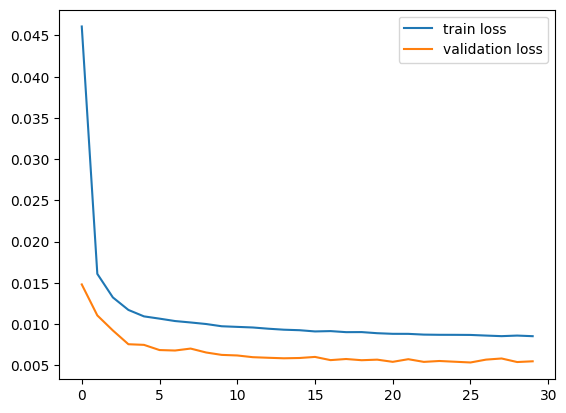

In [28]:
BATCH_SIZE = 2
model = Sequential(name="GRU13_Batch2")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(GRU(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0, batch_size=BATCH_SIZE)
show_results(X_test, y_test, model, history , batch_size=BATCH_SIZE)

Model: "GRU13_Batch1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (1, 13)                   1092      
                                                                 
 dense_28 (Dense)            (1, 13)                   182       
                                                                 
Total params: 1,274
Trainable params: 1,274
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w4/GRU13_Batch1\assets


INFO:tensorflow:Assets written to: models_w4/GRU13_Batch1\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001471,0.010667,0.000825,0.013166,0.000208,0.003380,0.003436,0.002266,0.008361,0.033107,0.034336,0.001055,0.005155
R2,0.017721,0.549973,-0.176101,0.005445,0.298628,0.008594,0.665743,0.375204,0.634813,0.806279,0.138239,-0.121908,0.511942


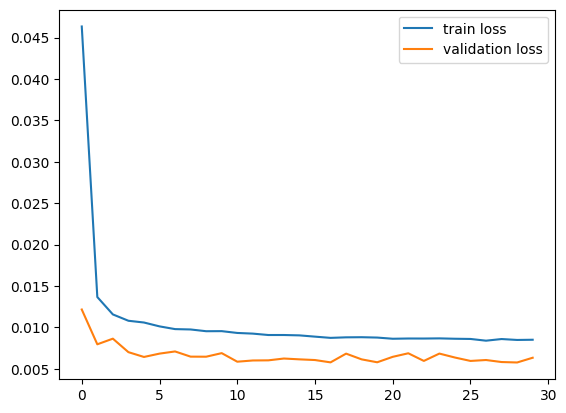

In [29]:
BATCH_SIZE = 1
model = Sequential(name="GRU13_Batch1")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(GRU(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0, batch_size=BATCH_SIZE)
show_results(X_test, y_test, model, history , batch_size=BATCH_SIZE)

Model: "GRU32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 32)                4512      
                                                                 
 dense_29 (Dense)            (None, 13)                429       
                                                                 
Total params: 4,941
Trainable params: 4,941
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w4/GRU32\assets


INFO:tensorflow:Assets written to: models_w4/GRU32\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.002289,0.016527,0.001237,0.015483,0.001135,0.003778,0.007361,0.002876,0.009643,0.033342,0.046085,0.001931,0.004317
R2,-0.528167,0.302765,-0.764214,-0.169637,-2.828443,-0.107957,0.283921,0.206864,0.578814,0.804899,-0.156640,-1.054129,0.591330


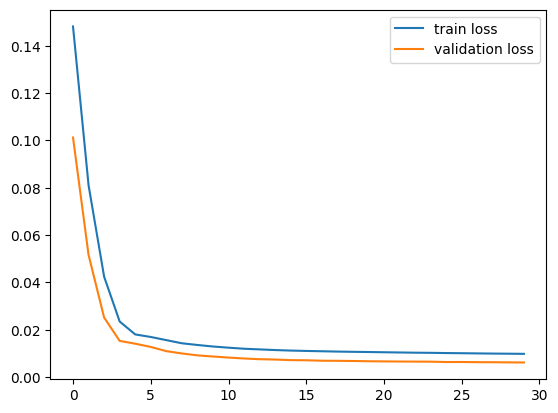

In [30]:
model = Sequential(name="GRU32")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(GRU(32, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0)
show_results(X_test, y_test, model, history)

Model: "GRU64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 64)                15168     
                                                                 
 dense_30 (Dense)            (None, 13)                845       
                                                                 
Total params: 16,013
Trainable params: 16,013
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w4/GRU64\assets


INFO:tensorflow:Assets written to: models_w4/GRU64\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001981,0.011500,0.000902,0.014499,0.000231,0.002943,0.005706,0.002599,0.008196,0.029136,0.034364,0.001445,0.004570
R2,-0.322232,0.514849,-0.285520,-0.095231,0.220461,0.136683,0.444909,0.283254,0.642048,0.829510,0.137523,-0.537073,0.567323


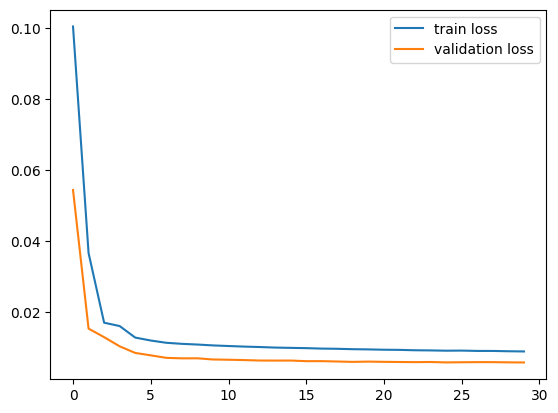

In [31]:
model = Sequential(name="GRU64")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(GRU(64, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0)
show_results(X_test, y_test, model, history)

Model: "GRU32_Batch4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_7 (GRU)                 (4, 32)                   4512      
                                                                 
 dense_31 (Dense)            (4, 13)                   429       
                                                                 
Total params: 4,941
Trainable params: 4,941
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: models_w4/GRU32_Batch4\assets


INFO:tensorflow:Assets written to: models_w4/GRU32_Batch4\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001725,0.009426,0.000921,0.015533,0.000220,0.003137,0.003386,0.002495,0.005925,0.031402,0.034786,0.001306,0.006446
R2,-0.151861,0.602346,-0.313660,-0.173405,0.258317,0.079843,0.670607,0.312105,0.741224,0.816252,0.126945,-0.388948,0.389791


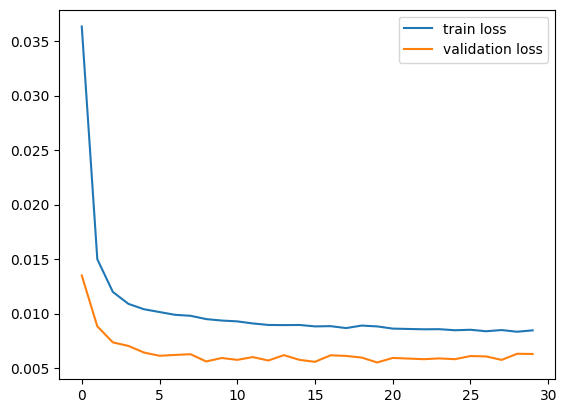

In [32]:
BATCH_SIZE = 4
model = Sequential(name="GRU32_Batch4")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(GRU(32, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0, batch_size=BATCH_SIZE)
show_results(X_test, y_test, model, history , batch_size=BATCH_SIZE)

Model: "GRU64_GRU13_Dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 4, 32)             4512      
                                                                 
 gru_9 (GRU)                 (None, 13)                1833      
                                                                 
 dense_32 (Dense)            (None, 13)                182       
                                                                 
Total params: 6,527
Trainable params: 6,527
Non-trainable params: 0
_________________________________________________________________
None


INFO:tensorflow:Assets written to: models_w4/GRU64_GRU13_Dense\assets


INFO:tensorflow:Assets written to: models_w4/GRU64_GRU13_Dense\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001686,0.022083,0.000682,0.016428,0.000823,0.003557,0.005476,0.003109,0.010168,0.027377,0.033433,0.000894,0.005930
R2,-0.125675,0.068400,0.028116,-0.240996,-1.776539,-0.043165,0.467288,0.142739,0.555910,0.839806,0.160906,0.049345,0.438648


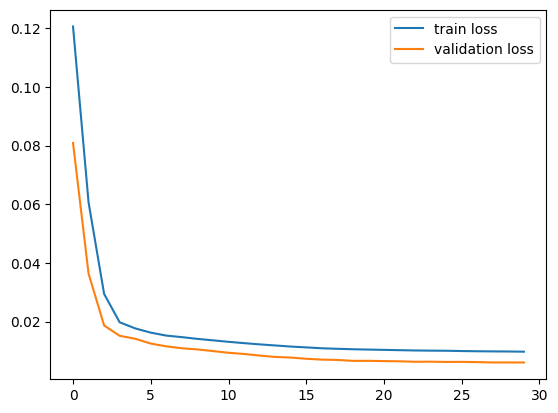

In [33]:
model = Sequential(name="GRU64_GRU13_Dense")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(GRU(32, return_sequences=True))
model.add(GRU(PARAMS_LENGTH, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
print(model.summary())
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0)
show_results(X_test, y_test, model, history)

Model: "GRU64_GRU32_Dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_10 (GRU)                (None, 4, 64)             15168     
                                                                 
 gru_11 (GRU)                (None, 32)                9408      
                                                                 
 dense_33 (Dense)            (None, 13)                429       
                                                                 
Total params: 25,005
Trainable params: 25,005
Non-trainable params: 0
_________________________________________________________________
None


INFO:tensorflow:Assets written to: models_w4/GRU64_GRU32_Dense\assets


INFO:tensorflow:Assets written to: models_w4/GRU64_GRU32_Dense\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.002228,0.013783,0.000861,0.013632,0.000291,0.002758,0.005051,0.002530,0.009035,0.030882,0.035899,0.001215,0.004678
R2,-0.487338,0.418547,-0.227782,-0.029771,0.017288,0.191174,0.508643,0.302269,0.605388,0.819298,0.098993,-0.292812,0.557118


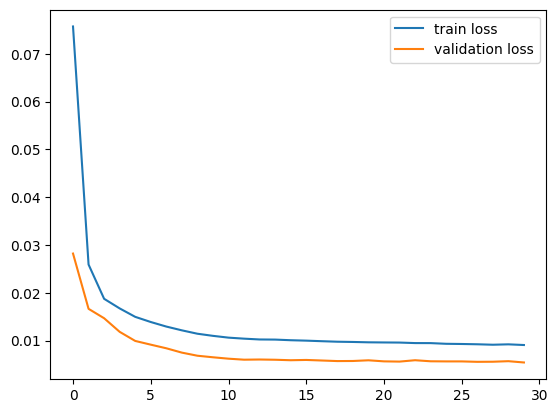

In [34]:
model = Sequential(name="GRU64_GRU32_Dense")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
print(model.summary())
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0)
show_results(X_test, y_test, model, history)

Model: "GRU32xGRU32_Batch4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (4, 4, 32)                4512      
                                                                 
 gru_13 (GRU)                (4, 32)                   6336      
                                                                 
 dense_34 (Dense)            (4, 13)                   429       
                                                                 
Total params: 11,277
Trainable params: 11,277
Non-trainable params: 0
_________________________________________________________________
None


INFO:tensorflow:Assets written to: models_w4/GRU32xGRU32_Batch4\assets


INFO:tensorflow:Assets written to: models_w4/GRU32xGRU32_Batch4\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001565,0.012604,0.001001,0.013141,0.000180,0.002795,0.003690,0.002415,0.005626,0.033264,0.037404,0.001381,0.005492
R2,-0.044913,0.468285,-0.427395,0.007296,0.394394,0.180327,0.641032,0.334060,0.754267,0.805357,0.061236,-0.469277,0.480048


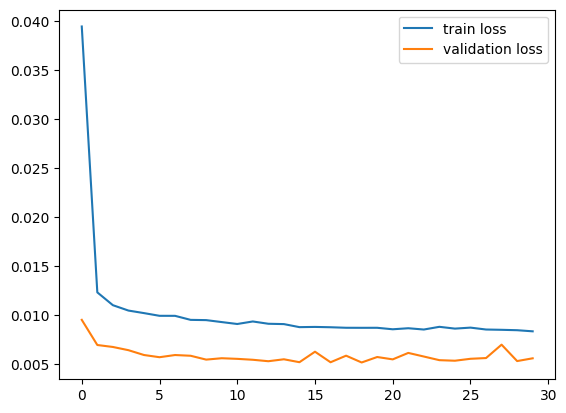

In [35]:
BATCH_SIZE=4
model = Sequential(name="GRU32xGRU32_Batch4")
model.add(Input((WINDOW, PARAMS_LENGTH), batch_size=BATCH_SIZE))
model.add(GRU(32, return_sequences=True))
model.add(GRU(32, return_sequences=False))
model.add(Dense(PARAMS_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
print(model.summary())
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=BATCH_SIZE, verbose=0)
show_results(X_test, y_test, model, history, batch_size=BATCH_SIZE)

## Train with static parameters


Lets define new function for splitting

In [36]:
(X_train, y_train), (X_test, y_test), (X_val, y_val) = \
datacovid.prepare_data_with_static(df_input=df, window=4)
(X_train, y_train), (X_test, y_test), (X_val, y_val) =\
    (X_train, y_train), (X_test[4:], y_test[4:]), (X_val[4:], y_val[4:])
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape), (X_val.shape, y_val.shape)

(((288, 4, 47), (288, 13)), ((32, 4, 47), (32, 13)), ((32, 4, 47), (32, 13)))

#### FNN

Flatten3Layers_Mixed

Model: "Flatten3Layers_Mixed"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 188)               0         
                                                                 
 dense_35 (Dense)            (None, 128)               24192     
                                                                 
 dense_36 (Dense)            (None, 64)                8256      
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 13)                429       
                                                                 
Total params: 34,957
Trainable params: 34,957
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
9/9 [==========================

INFO:tensorflow:Assets written to: models_w4/Flatten3Layers_Mixed\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.003314,0.002268,0.003093,0.019193,0.001121,0.002350,0.011185,0.008184,0.007531,0.026337,0.064358,0.002929,0.006654
R2,-3.730922,-128.922573,-6.195192,-0.831238,-1.881025,-2.627866,0.011026,-0.486396,0.293515,0.800226,-0.762103,-2.573944,0.515039


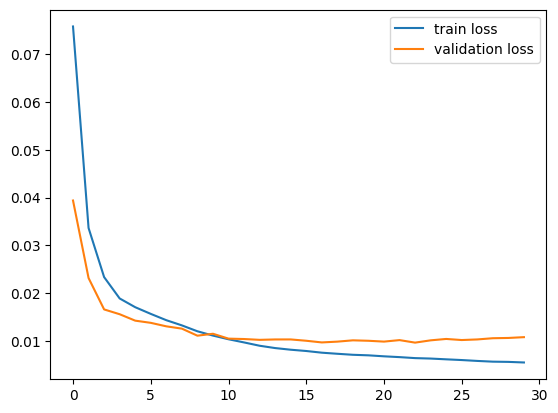

In [37]:
model = Sequential(name="Flatten3Layers_Mixed")
PARAMS_LENGTH=X_train.shape[2]
TARGET_LENGTH=y_train.shape[1]
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(TARGET_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
show_results(X_test, y_test, model, history)

Model: "Flatten3Layers_Mixed_flatten"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 188)               0         
                                                                 
 dense_39 (Dense)            (None, 128)               24192     
                                                                 
 dense_40 (Dense)            (None, 64)                8256      
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dense_42 (Dense)            (None, 13)                429       
                                                                 
Total params: 34,957
Trainable params: 34,957
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
9/9 [==================

INFO:tensorflow:Assets written to: models_w4/Flatten3Layers_Mixed_flatten\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.002143,0.001472,0.001724,0.018425,0.003326,0.003862,0.010795,0.007165,0.009731,0.026070,0.06137,0.001767,0.007117
R2,-2.058989,-83.285055,-3.009570,-0.758005,-7.544391,-4.962606,0.045501,-0.301305,0.087104,0.802257,-0.68028,-1.155848,0.481299


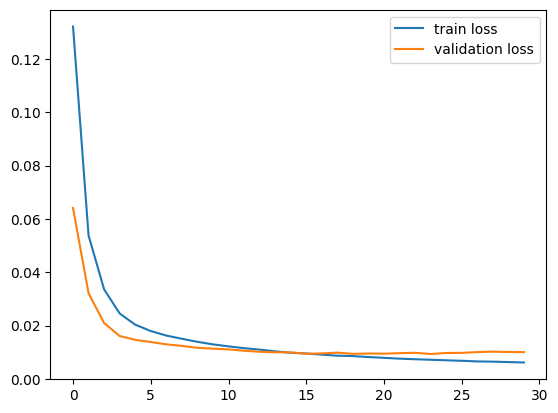

In [38]:
model = Sequential(name="Flatten3Layers_Mixed_flatten")
PARAMS_LENGTH=X_train.shape[2]
TARGET_LENGTH=y_train.shape[1]
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(TARGET_LENGTH, activation="linear"))
model.compile(optimizer="adam", loss="mse")
model.summary()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
show_results(X_test, y_test, model, history)

#### RNN

RNN32Mixed

RNN - all info in the vectors

Model: "RNN32Mixed"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 60)                6480      
                                                                 
 dense_43 (Dense)            (None, 13)                793       
                                                                 
Total params: 7,273
Trainable params: 7,273
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
9/9 [==============================] - 1s 53ms/step - loss: 0.3643 - val_loss: 0.1437
Epoch 2/30
9/9 [==============================] - 0s 6ms/step - loss: 0.1383 - val_loss: 0.0911
Epoch 3/30
9/9 [==============================] - 0s 6ms/step - loss: 0.0948 - val_loss: 0.0612
Epoch 4/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0680 - val_loss: 0.0543
Epoch 5/30
9/9 [==============================] - 0s 10ms/step -

INFO:tensorflow:Assets written to: models_w4/RNN32Mixed\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.010306,0.008573,0.004599,0.013770,0.009374,0.010366,0.018407,0.008644,0.012110,0.026704,0.042150,0.011061,0.012842
R2,-13.712530,-490.005858,-9.696518,-0.313814,-23.081011,-15.005468,-0.627564,-0.569803,-0.136065,0.797445,-0.154062,-12.497238,0.064007


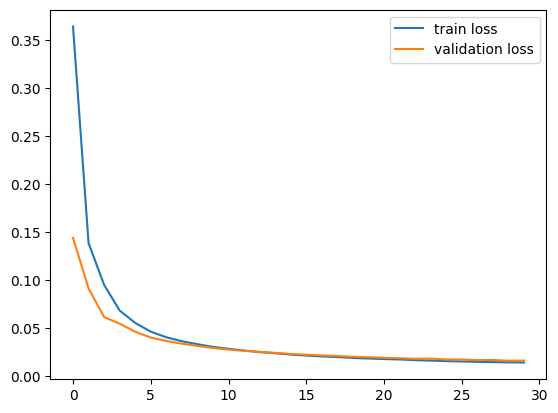

In [39]:
RNN_LENGTH = PARAMS_LENGTH+TARGET_LENGTH
model = Sequential(name="RNN32Mixed")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(SimpleRNN(RNN_LENGTH, return_sequences=False))
model.add(Dense(TARGET_LENGTH, activation="linear"))
model_lstm = model
model_lstm.compile(optimizer="adam", loss="mse")
model_lstm.summary()
history = model_lstm.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
show_results(X_test, y_test, model_lstm, history)

LSTM64Mixed

Model: "LSTM64Mixed"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 64)                28672     
                                                                 
 dense_44 (Dense)            (None, 13)                845       
                                                                 
Total params: 29,517
Trainable params: 29,517
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
9/9 [==============================] - 4s 89ms/step - loss: 0.1184 - val_loss: 0.0379
Epoch 2/30
9/9 [==============================] - 0s 8ms/step - loss: 0.0414 - val_loss: 0.0278
Epoch 3/30
9/9 [==============================] - 0s 10ms/step - loss: 0.0296 - val_loss: 0.0188
Epoch 4/30
9/9 [==============================] - 0s 10ms/step - loss: 0.0221 - val_loss: 0.0149
Epoch 5/30
9/9 [==============================] - 0s 9ms/ste

INFO:tensorflow:Assets written to: models_w4/LSTM64Mixed\assets


INFO:tensorflow:Assets written to: models_w4/LSTM64Mixed\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.002121,0.000467,0.001630,0.012377,0.000962,0.001516,0.009293,0.006404,0.007207,0.015870,0.045100,0.000981,0.007795
R2,-2.028498,-25.739334,-2.791581,-0.180914,-1.472590,-1.340921,0.178287,-0.163057,0.323885,0.879623,-0.234835,-0.197619,0.431887


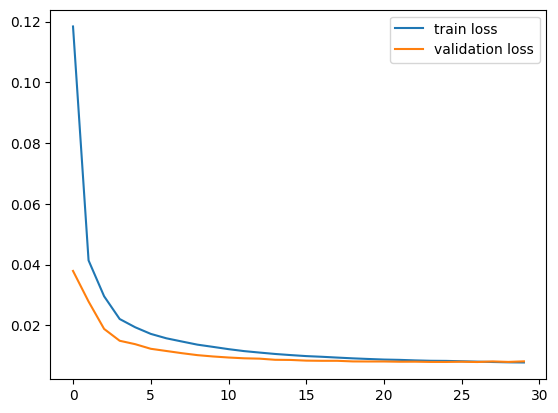

In [40]:
PARAMS_LENGTH = X_train.shape[2]
TARGET_LENGTH = y_train.shape[1]
model = Sequential(name="LSTM64Mixed")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(TARGET_LENGTH, activation="linear"))
model_lstm = model
model_lstm.compile(optimizer="adam", loss="mse")
model_lstm.summary()
history = model_lstm.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
show_results(X_test, y_test, model_lstm, history)

LSTMtoLSTM_Mixed

Model: "LSTMtoLSTM_Mixed"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 4, 64)             28672     
                                                                 
 lstm_21 (LSTM)              (None, 64)                33024     
                                                                 
 dense_45 (Dense)            (None, 13)                845       
                                                                 
Total params: 62,541
Trainable params: 62,541
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
9/9 [==============================] - 5s 159ms/step - loss: 0.0845 - val_loss: 0.0304
Epoch 2/30
9/9 [==============================] - 0s 11ms/step - loss: 0.0306 - val_loss: 0.0183
Epoch 3/30
9/9 [==============================] - 0s 12ms/step - loss: 0.0217 - val_loss: 0.0128
Epoch 4/30
9/9 [==

INFO:tensorflow:Assets written to: models_w4/LSTMtoLSTM_Mixed\assets


INFO:tensorflow:Assets written to: models_w4/LSTMtoLSTM_Mixed\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.001339,0.000927,0.000616,0.013195,0.000462,0.001046,0.008598,0.005739,0.008095,0.024577,0.045339,0.000752,0.007818
R2,-0.912056,-52.107067,-0.433156,-0.258971,-0.187724,-0.615297,0.239766,-0.042202,0.240585,0.813580,-0.241378,0.082804,0.430166


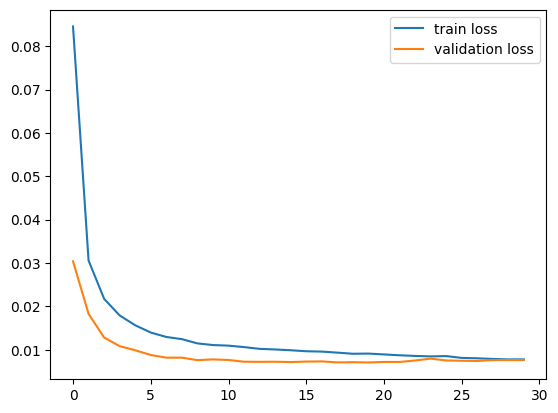

In [41]:
PARAMS_LENGTH = X_train.shape[2]
TARGET_LENGTH = y_train.shape[1]
model = Sequential(name="LSTMtoLSTM_Mixed")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(TARGET_LENGTH, activation="linear"))
model_lstm = model
model_lstm.compile(optimizer="adam", loss="mse")
model_lstm.summary()
history = model_lstm.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
show_results(X_test, y_test, model_lstm, history)

GRU64Mixed

Model: "GRU64Mixed"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_14 (GRU)                (None, 64)                21696     
                                                                 
 dense_46 (Dense)            (None, 13)                845       
                                                                 
Total params: 22,541
Trainable params: 22,541
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
9/9 [==============================] - 4s 115ms/step - loss: 0.1733 - val_loss: 0.0684
Epoch 2/30
9/9 [==============================] - 0s 10ms/step - loss: 0.0687 - val_loss: 0.0562
Epoch 3/30
9/9 [==============================] - 0s 15ms/step - loss: 0.0503 - val_loss: 0.0395
Epoch 4/30
9/9 [==============================] - 0s 9ms/step - loss: 0.0373 - val_loss: 0.0284
Epoch 5/30
9/9 [==============================] - 0s 10ms/st

INFO:tensorflow:Assets written to: models_w4/GRU64Mixed\assets


INFO:tensorflow:Assets written to: models_w4/GRU64Mixed\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.002207,0.002199,0.001932,0.014665,0.00201,0.001896,0.009309,0.007744,0.005946,0.016873,0.042537,0.003381,0.006563
R2,-2.150283,-124.947598,-3.494458,-0.399184,-4.16440,-1.927832,0.176891,-0.406370,0.442200,0.872012,-0.164643,-3.125293,0.521670


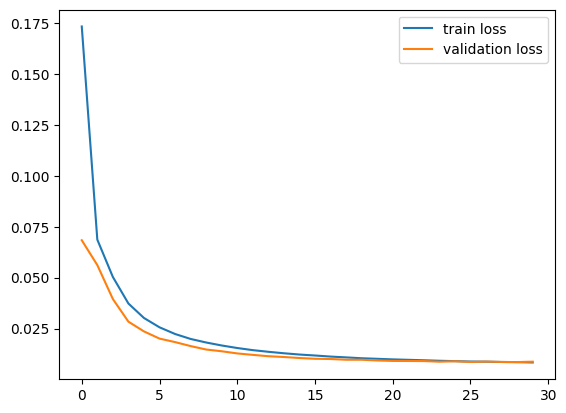

In [42]:
PARAMS_LENGTH = X_train.shape[2]
TARGET_LENGTH = y_train.shape[1]
model = Sequential(name="GRU64Mixed")
model.add(Input((WINDOW, PARAMS_LENGTH)))
model.add(GRU(64, return_sequences=False))
model.add(Dense(TARGET_LENGTH, activation="linear"))
model_lstm = model
model_lstm.compile(optimizer="adam", loss="mse")
model_lstm.summary()
history = model_lstm.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
show_results(X_test, y_test, model_lstm, history)

CNN64_Maxpooling_dropout

2CNN64_Maxpooling_CNN_dropout

RNN - dynamic and static params aparted

StaticDense_DynamicLSTM_oneLayer

In [43]:
D_train = X_train[:, :, 29:]
S_train = X_train[:, 0, 0:29]
S_train = np.hstack([S_train, X_train[:, 0, 42:43]])
D_val = X_val[:, :, 29:]
S_val = X_val[:, 0, :29]
S_val = np.hstack([S_val, X_val[:, 0, 42:43]])


StaticDense_DynamicLSTM_oneLayer

Model: "StaticDense_DynamicLSTM_oneLayer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_39 (InputLayer)          [(None, 4, 18)]      0           []                               
                                                                                                  
 input_38 (InputLayer)          [(None, 30)]         0           []                               
                                                                                                  
 lstm_22 (LSTM)                 (None, 40)           9440        ['input_39[0][0]']               
                                                                                                  
 dense_47 (Dense)               (None, 16)           496         ['input_38[0][0]']               
                                                                   

INFO:tensorflow:Assets written to: models_w4/StaticDense_DynamicLSTM_oneLayer\assets


INFO:tensorflow:Assets written to: models_w4/StaticDense_DynamicLSTM_oneLayer\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.003019,0.005054,0.004760,0.017305,0.005960,0.003806,0.007765,0.010155,0.017538,0.002201,0.056248,0.003994,0.005529
R2,-1.680399,-126.841938,-12.830197,-0.335309,-28.071676,-4.513221,-0.307556,-0.970221,-0.402111,0.974094,-1.120695,-8.021761,0.558059


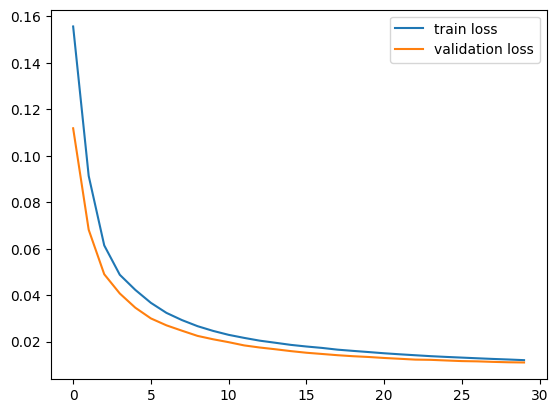

In [44]:
SPARAMS_LENGTH = S_train.shape[1]
DPARAMS_LENGTH = D_train.shape[2]
input_static = Input((SPARAMS_LENGTH))
input_dinamic = Input((WINDOW, DPARAMS_LENGTH))
dense_layer = Dense(16, activation='relu')(input_static)
lstm_layer = LSTM(40, return_state=False)(input_dinamic)
result_layer = Dense(13, activation='linear')(concatenate([lstm_layer, dense_layer]))
model = Model(name="StaticDense_DynamicLSTM_oneLayer", inputs=[input_static, input_dinamic], outputs=result_layer)
model.summary()
model.compile(optimizer="adam", loss="mse")

history = model.fit(x=[S_train, D_train], y=y_train, validation_data=([S_val, D_val], y_val), epochs=30)
show_results([S_val, D_val], y_val, model, history)

StaticDense_DynamicLSTM_twoLayers

LSTM - with two layers on the output

Model: "StaticDense_DynamicLSTM_twoLayers"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_41 (InputLayer)          [(None, 4, 18)]      0           []                               
                                                                                                  
 input_40 (InputLayer)          [(None, 30)]         0           []                               
                                                                                                  
 lstm_23 (LSTM)                 (None, 64)           21248       ['input_41[0][0]']               
                                                                                                  
 dense_49 (Dense)               (None, 32)           992         ['input_40[0][0]']               
                                                                  

INFO:tensorflow:Assets written to: models_w4/StaticDense_DynamicLSTM_twoLayers\assets


INFO:tensorflow:Assets written to: models_w4/StaticDense_DynamicLSTM_twoLayers\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.003450,0.003582,0.001437,0.015443,0.001066,0.002258,0.004753,0.008588,0.021722,0.003503,0.046830,0.001962,0.004760
R2,-2.062796,-89.618745,-3.173486,-0.191618,-4.201579,-2.270768,0.199579,-0.666231,-0.736602,0.958771,-0.765617,-3.431596,0.619487


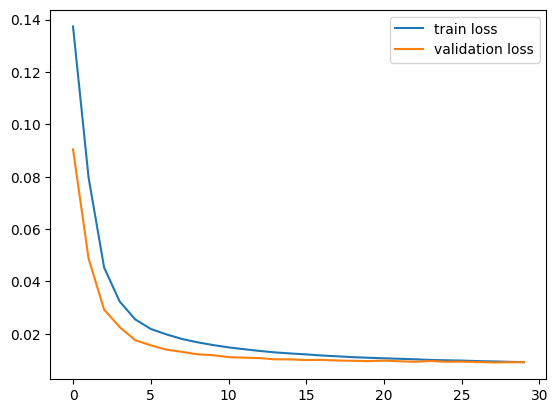

In [45]:
SPARAMS_LENGTH = S_train.shape[1]
DPARAMS_LENGTH = D_train.shape[2]
input_static = Input((SPARAMS_LENGTH))
input_dinamic = Input((WINDOW, DPARAMS_LENGTH))
dense_layer = Dense(32, activation='relu')(input_static)
lstm_layer = LSTM(64, return_state=False)(input_dinamic)
result_layer = Dense(32, activation="relu")(concatenate([lstm_layer, dense_layer]))
result_layer = Dense(13, activation='linear')(result_layer)
model = Model(name="StaticDense_DynamicLSTM_twoLayers", inputs=[input_static, input_dinamic], outputs=result_layer)
model.summary()
model.compile(optimizer="adam", loss="mse")
history = model.fit(x=[S_train, D_train], y=y_train, validation_data=([S_val, D_val], y_val), epochs=30)
show_results([S_val, D_val], y_val, model, history)

StaticDense_DynamicGRU_twolayers

Model: "StaticDense_DynamicGRU_twolayers"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_43 (InputLayer)          [(None, 4, 18)]      0           []                               
                                                                                                  
 input_42 (InputLayer)          [(None, 30)]         0           []                               
                                                                                                  
 gru_15 (GRU)                   (None, 64)           16128       ['input_43[0][0]']               
                                                                                                  
 dense_52 (Dense)               (None, 32)           992         ['input_42[0][0]']               
                                                                   

INFO:tensorflow:Assets written to: models_w4/StaticDense_DynamicGRU_twolayers\assets


INFO:tensorflow:Assets written to: models_w4/StaticDense_DynamicGRU_twolayers\assets


,Температура_dinam_fact,Лимфоциты#_dinam_fact,АСТ_dinam_fact,ЧСС_dinam_fact,ЧДД_dinam_fact,Билирубин общий_dinam_fact,MPV- Средн.объем тромбоцитов_dinam_fact,PCT- Тромбокрит_dinam_fact,Лимфоциты%_dinam_fact,снижение_сознания_dinam_fact,Cтепень тяжести по КТ_dinam_fact,Лактатдегидрогеназа_dinam_fact,PDW- Индекс расп.по объему тр._dinam_fact
MSE,0.003808,0.003641,0.001976,0.015081,0.002357,0.003361,0.007308,0.007232,0.017977,0.002568,0.031870,0.002166,0.003408
R2,-2.381005,-91.114818,-4.742124,-0.163697,-10.497284,-3.868297,-0.230727,-0.403101,-0.437171,0.969771,-0.201569,-3.891715,0.727560


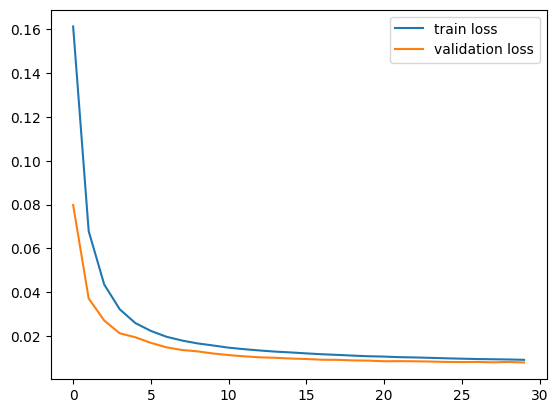

In [46]:
SPARAMS_LENGTH = S_train.shape[1]
DPARAMS_LENGTH = D_train.shape[2]
input_static = Input((SPARAMS_LENGTH))
input_dinamic = Input((WINDOW, DPARAMS_LENGTH))
dense_layer = Dense(32, activation='relu')(input_static)
lstm_layer = GRU(64, return_state=False)(input_dinamic)
result_layer = Dense(32, activation="relu")(concatenate([lstm_layer, dense_layer]))
result_layer = Dense(13, activation='linear')(result_layer)
model = Model(name="StaticDense_DynamicGRU_twolayers", inputs=[input_static, input_dinamic], outputs=result_layer)
model.summary()
model.compile(optimizer="adam", loss="mse")
history = model.fit(x=[S_train, D_train], y=y_train, validation_data=([S_val, D_val], y_val), epochs=30)
show_results([S_val, D_val], y_val, model, history)

StaticDense_DynamicLSTM_batch4

LSTM as above but train dataset divided on batch to control overfit

In [47]:
SPARAMS_LENGTH = S_train.shape[1]
DPARAMS_LENGTH = D_train.shape[2]
BATCH_SIZE=4
input_static = Input((SPARAMS_LENGTH), batch_size=BATCH_SIZE)
input_dinamic = Input((WINDOW, DPARAMS_LENGTH), batch_size=BATCH_SIZE)
dense_layer = Dense(32, activation='relu')(input_static)
lstm_layer = LSTM(64, return_state=False)(input_dinamic)
result_layer = Dense(13, activation='linear')(result_layer)
model = Model(name="StaticDense_DynamicLSTM_batch4", inputs=[input_static, input_dinamic], outputs=result_layer)
model.summary()
model.compile(optimizer="adam", loss="mse")
history = model.fit(x=[S_train, D_train], y=y_train, validation_data=([S_val, D_val], y_val), epochs=30, batch_size=BATCH_SIZE)
show_results([S_val, D_val], y_val, model, history, batch_size=BATCH_SIZE)

ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 4, 18), dtype=tf.float32, name='input_43'), name='input_43', description="created by layer 'input_43'") at layer "gru_15". The following previous layers were accessed without issue: []